In [1]:
%matplotlib notebook
%matplotlib inline

# typical sigpy and numpy imports
import numpy as np
import sigpy.mri.rf as rf # import for our RF pulse design tools 
import sigpy.plot as pl
import matplotlib.pyplot as plt
import slfrank

In [2]:
# specify the pulse parameters for SLR design
N = 550
tb = 2
d1 = 0.02
d2 = 0.005

In [3]:
# compute the SLR pulse
# st, pm
ptype = 'st'
ftype = 'pm'
pulse_slr_st_pm = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pulse_slr_st_pm = pulse_slr_st_pm/np.sum(pulse_slr_st_pm)   # normalize the SLR pulse by its area under the curve (proportional to flip angle)

# compute the Cayley-Klein coefficients of the RF pulse
[a_slr_st_pm, b_slr_st_pm] = rf.sim.abrm(pulse_slr_st_pm, np.arange(-2*tb, 2*tb, 0.01), True)
# Simulate Mz from thermal equilibrium
Mz_slr_st_pm = 1-2*np.abs(b_slr_st_pm)**2
# Simulate Mxy from thermal equilibrium
Mxy_slr_st_pm = 2*np.conj(a_slr_st_pm)*b_slr_st_pm

In [4]:
# compute the SLR pulse
# st, ls
ptype = 'st'
ftype = 'ls'
pulse_slr_st_ls = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pulse_slr_st_ls = pulse_slr_st_ls/np.sum(pulse_slr_st_ls)   # normalize the SLR pulse by its area under the curve (proportional to flip angle)

# compute the Cayley-Klein coefficients of the RF pulse
[a_slr_st_ls, b_slr_st_ls] = rf.sim.abrm(pulse_slr_st_ls, np.arange(-2*tb, 2*tb, 0.01), True)
# Simulate Mz from thermal equilibrium
Mz_slr_st_ls = 1-2*np.abs(b_slr_st_ls)**2
# Simulate Mxy from thermal equilibrium
Mxy_slr_st_ls = 2*np.conj(a_slr_st_ls)*b_slr_st_ls

In [5]:
# compute the SLR pulse
# ex, pm
ptype = 'ex'
ftype = 'pm'
pulse_slr_ex_pm = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pulse_slr_ex_pm = pulse_slr_ex_pm/np.sum(pulse_slr_ex_pm)   # normalize the SLR pulse by its area under the curve (proportional to flip angle)

# compute the Cayley-Klein coefficients of the RF pulse
[a_slr_ex_pm, b_slr_ex_pm] = rf.sim.abrm(pulse_slr_ex_pm, np.arange(-2*tb, 2*tb, 0.01), True)
# Simulate Mz from thermal equilibrium
Mz_slr_ex_pm = 1-2*np.abs(b_slr_ex_pm)**2
# Simulate Mxy from thermal equilibrium
Mxy_slr_ex_pm = 2*np.conj(a_slr_ex_pm)*b_slr_ex_pm

In [6]:
# compute the SLR pulse
# ex, ls
ptype = 'ex'
ftype = 'ls'
pulse_slr_ex_ls = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pulse_slr_ex_ls = pulse_slr_ex_ls/np.sum(pulse_slr_ex_ls)   # normalize the SLR pulse by its area under the curve (proportional to flip angle)

# compute the Cayley-Klein coefficients of the RF pulse
[a_slr_ex_ls, b_slr_ex_ls] = rf.sim.abrm(pulse_slr_ex_ls, np.arange(-2*tb, 2*tb, 0.01), True)
# Simulate Mz from thermal equilibrium
Mz_slr_ex_ls = 1-2*np.abs(b_slr_ex_ls)**2
# Simulate Mxy from thermal equilibrium
Mxy_slr_ex_ls = 2*np.conj(a_slr_ex_ls)*b_slr_ex_ls

In [7]:
# generate SLfRank pulse
print('Generating SLfRank pulse')
solver = 'PDHG'
for ptype, phase in [('ex', 'linear')]:
    print(f'Pulse Type:\t{ptype}')
    print(f'Phase:\t\t{phase}')
    if phase == 'linear':
        ftype = 'pm'
    else:
        ftype = phase

    pulse_slfrank_ex_pm_temp = slfrank.design_rf(n=64, tb=tb, ptype=ptype, phase=phase,
                                      d1=d1, d2=d2, solver=solver)

Generating SLfRank pulse
Pulse Type:	ex
Phase:		linear


DesignPaulynomials:   0%|          | 0/3000 [00:00<?, ?it/s]

In [8]:
# interpolate SLfRank pulse to N
from scipy import interpolate
f = interpolate.interp1d(np.arange(0, 64), pulse_slfrank_ex_pm_temp, kind='cubic')
pulse_slfrank_ex_pm = f(np.linspace(0, 63, N))
pulse_slfrank_ex_pm = pulse_slfrank_ex_pm/np.sum(pulse_slfrank_ex_pm)  # normalize by area under curve of pulse (proportional to flip angle)

# compute the Cayley-Klein coefficients of the RF pulse
[a_slfrank_ex_pm, b_slfrank_ex_pm] = rf.sim.abrm(pulse_slfrank_ex_pm, np.arange(-2*tb, 2*tb, 0.01), True)
# Simulate Mz from thermal equilibrium
Mz_slfrank_ex_pm = 1-2*np.abs(b_slfrank_ex_pm)**2
# Simulate Mxy from thermal equilibrium
Mxy_slfrank_ex_pm = 2*np.conj(a_slfrank_ex_pm)*b_slfrank_ex_pm

In [9]:
# simulate Hanning window pulse
n = np.arange(0, N)
pulse_hann = (0.5 - 0.5*np.cos(2*np.pi*n/(N-1)))
pulse_hann = pulse_hann/np.sum(pulse_hann)   # normalize by area under curve of pulse (proportional to flip angle)

# compute the Cayley-Klein parameters for the Hanning window
[a_hann, b_hann] = rf.sim.abrm(pulse_hann, np.arange(-2*tb, 2*tb, 0.01), True)
# Simulate Mz from thermal equilibrium
Mz_hann = 1-2*np.abs(b_hann)**2
# Simulate Mxy from thermal equilibrium
Mxy_hann = 2*np.conj(a_hann)*b_hann

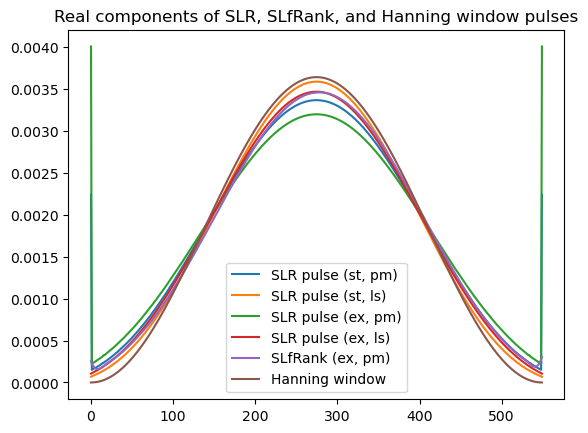

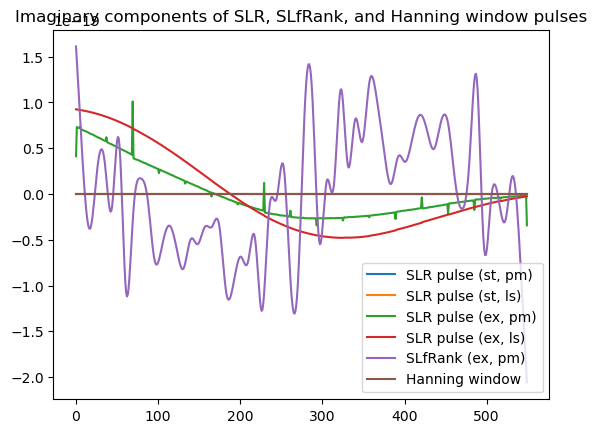

In [10]:
# Show the real and imaginary components of each pulse
plt.plot(np.real(pulse_slr_st_pm), label='SLR pulse (st, pm)')
plt.plot(np.real(pulse_slr_st_ls), label='SLR pulse (st, ls)')
plt.plot(np.real(pulse_slr_ex_pm), label='SLR pulse (ex, pm)')
plt.plot(np.real(pulse_slr_ex_ls), label='SLR pulse (ex, ls)')
plt.plot(np.real(pulse_slfrank_ex_pm), label='SLfRank (ex, pm)')
plt.plot(np.real(pulse_hann), label='Hanning window')
plt.title('Real components of SLR, SLfRank, and Hanning window pulses')
plt.legend()
plt.show()

plt.plot(np.imag(pulse_slr_st_pm), label='SLR pulse (st, pm)')
plt.plot(np.imag(pulse_slr_st_ls), label='SLR pulse (st, ls)')
plt.plot(np.imag(pulse_slr_ex_pm), label='SLR pulse (ex, pm)')
plt.plot(np.imag(pulse_slr_ex_ls), label='SLR pulse (ex, ls)')
plt.plot(np.imag(pulse_slfrank_ex_pm), label='SLfRank (ex, pm)')
plt.plot(np.imag(pulse_hann), label='Hanning window')
plt.title('Imaginary components of SLR, SLfRank, and Hanning window pulses')
plt.legend()
plt.show()

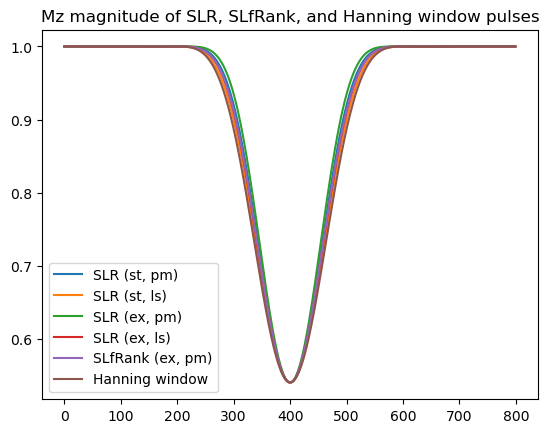

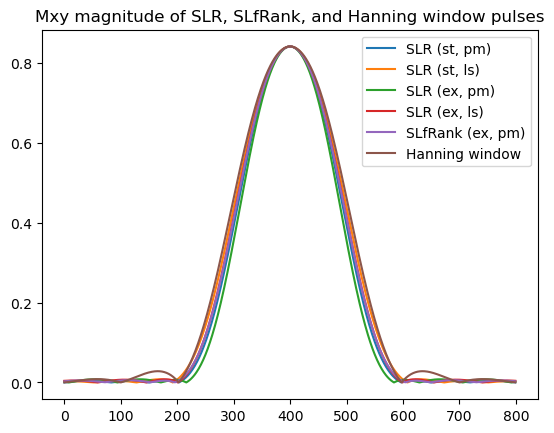

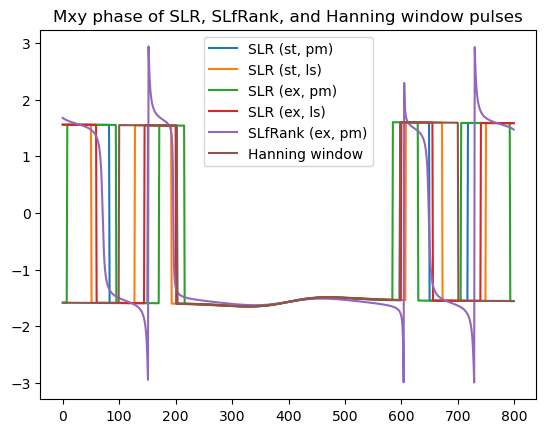

In [11]:
# Plot the magnitudes of Mz and Mxy after application of each pulse on thermal equilibrium
plt.plot(np.abs(Mz_slr_st_pm), label='SLR (st, pm)')
plt.plot(np.abs(Mz_slr_st_ls), label='SLR (st, ls)')
plt.plot(np.abs(Mz_slr_ex_pm), label='SLR (ex, pm)')
plt.plot(np.abs(Mz_slr_ex_ls), label='SLR (ex, ls)')
plt.plot(np.abs(Mz_slfrank_ex_pm), label='SLfRank (ex, pm)')
plt.plot(np.abs(Mz_hann), label='Hanning window')
plt.title('Mz magnitude of SLR, SLfRank, and Hanning window pulses')
plt.legend()
plt.show()

plt.plot(np.abs(Mxy_slr_st_pm), label='SLR (st, pm)')
plt.plot(np.abs(Mxy_slr_st_ls), label='SLR (st, ls)')
plt.plot(np.abs(Mxy_slr_ex_pm), label='SLR (ex, pm)')
plt.plot(np.abs(Mxy_slr_ex_ls), label='SLR (ex, ls)')
plt.plot(np.abs(Mxy_slfrank_ex_pm), label='SLfRank (ex, pm)')
plt.plot(np.abs(Mxy_hann), label='Hanning window')
plt.title('Mxy magnitude of SLR, SLfRank, and Hanning window pulses')
# plt.xlim(400, 700)
# plt.ylim(0, .04)
plt.legend()
plt.show()

plt.plot(np.angle(Mxy_slr_st_pm), label='SLR (st, pm)')
plt.plot(np.angle(Mxy_slr_st_ls), label='SLR (st, ls)')
plt.plot(np.angle(Mxy_slr_ex_pm), label='SLR (ex, pm)')
plt.plot(np.angle(Mxy_slr_ex_ls), label='SLR (ex, ls)')
plt.plot(np.angle(Mxy_slfrank_ex_pm), label='SLfRank (ex, pm)')
plt.plot(np.angle(Mxy_hann), label='Hanning window')
plt.title('Mxy phase of SLR, SLfRank, and Hanning window pulses')
plt.legend()
plt.show()

In [12]:
# compute energies and B1 peaks for the pulses
slr_st_pm_energy = np.sum(np.abs(pulse_slr_st_pm)**2)
slr_st_pm_peak = np.abs(pulse_slr_st_pm).max()

slr_st_ls_energy = np.sum(np.abs(pulse_slr_st_ls)**2)
slr_st_ls_peak = np.abs(pulse_slr_st_ls).max()

slr_ex_pm_energy = np.sum(np.abs(pulse_slr_ex_pm)**2)
slr_ex_pm_peak = np.abs(pulse_slr_ex_pm).max()

slr_ex_ls_energy = np.sum(np.abs(pulse_slr_ex_ls)**2)
slr_ex_ls_peak = np.abs(pulse_slr_ex_ls).max()

slfrank_ex_pm_energy = np.sum(np.abs(pulse_slfrank_ex_pm)**2)
slfrank_ex_pm_peak = np.abs(pulse_slfrank_ex_pm).max()

hann_energy = np.sum(np.abs(pulse_hann)**2)
hann_peak = np.abs(pulse_hann).max()

# compute the maximum energy and peaks across all 3 RFs
max_energy = np.max(np.array([slr_st_pm_energy, slr_st_ls_energy, slr_ex_pm_energy, slr_ex_ls_energy, slfrank_ex_pm_energy, hann_energy]))
max_peak = np.max(np.array([slr_st_pm_peak, slr_st_ls_peak, slr_ex_pm_peak, slr_ex_ls_peak, slfrank_ex_pm_peak, hann_peak]))

# compute relative energies and B1 peaks for the pulses
slr_st_pm_energy = slr_st_pm_energy/max_energy
slr_st_ls_energy = slr_st_ls_energy/max_energy
slr_ex_pm_energy = slr_ex_pm_energy/max_energy
slr_ex_ls_energy = slr_ex_ls_energy/max_energy
slfrank_ex_pm_energy = slfrank_ex_pm_energy/max_energy
hann_energy = hann_energy/max_energy

slr_st_pm_peak = slr_st_pm_peak/max_peak
slr_st_ls_peak = slr_st_ls_peak/max_peak
slr_ex_pm_peak = slr_ex_pm_peak/max_peak
slr_ex_ls_peak = slr_ex_ls_peak/max_peak
slfrank_ex_pm_peak = slfrank_ex_pm_peak/max_peak
hann_peak = hann_peak/max_peak


print(f'SLR (st, pm):\t\tEnergy={slr_st_pm_energy}\tPeak={slr_st_pm_peak}')
print(f'SLR (st, ls):\t\tEnergy={slr_st_ls_energy}\tPeak={slr_st_ls_peak}')
print(f'SLR (ex, pm):\t\tEnergy={slr_ex_pm_energy}\tPeak={slr_ex_pm_peak}')
print(f'SLR (ex, ls):\t\tEnergy={slr_ex_ls_energy}\tPeak={slr_ex_ls_peak}')
print(f'SLfRank (ex, pm):\tEnergy={slfrank_ex_pm_energy}\tPeak={slfrank_ex_pm_peak}')
print(f'Hann:\t\t\tEnergy={hann_energy}\t\t\tPeak={hann_peak}')

SLR (st, pm):		Energy=0.9064486522717626	Peak=0.8402570470275699
SLR (st, ls):		Energy=0.9637167659675405	Peak=0.8953296488139872
SLR (ex, pm):		Energy=0.869801659817508	Peak=1.0
SLR (ex, ls):		Energy=0.9313987986564758	Peak=0.86544707932637
SLfRank (ex, pm):	Energy=0.9262400489618836	Peak=0.8632975382211094
Hann:			Energy=1.0			Peak=0.9087482991394417


In [13]:
# converted .mrp writing code from matlab to python using Bing chat
def write_rf(fname, rf, timestep, rephase_time, bandwidth):
    fname = fname + '.mrp'
    rrf = rf.real
    irf = rf.imag
    with open(fname,'wt') as F:
        F.write('[General]\n')
        F.write('data_real=')
        for indx in range(len(rf)):
            if indx != len(rf)-1:
                F.write(f'{rrf[indx]}, ')
            else:
                F.write(f'{rrf[indx]}\n')
        F.write('data_imag=')
        for indx in range(len(rf)):
            if indx != len(rf)-1:
                F.write(f'{irf[indx]}, ')
            else:
                F.write(f'{irf[indx]}\n')
        F.write('timestep=')
        F.write(f'{timestep}\n')
        F.write('rephase_time=')
        F.write(f'{rephase_time}\n')
        F.write('bandwidth=')
        F.write(f'{bandwidth}\n')

In [14]:
# write RF pulse to .mrp file format for st4
# make sure function inputs are in the correct units
timestep = 0.001   # in ms
rephase_time = 0.275   # in ms
bandwidth = 3636   # in Hz
write_rf('slr_ex_pm', pulse_slr_ex_pm, timestep, rephase_time, bandwidth)
write_rf('slr_st_pm', pulse_slr_st_pm, timestep, rephase_time, bandwidth)
write_rf('slfrank_ex_pm', pulse_slfrank_ex_pm, timestep, rephase_time, bandwidth)